In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import glob

In [32]:
path = r'/home/harindu/Assignment_II/accel_data' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None)
    li.append(df)

activityDF = pd.concat(li, axis=0, ignore_index=True)

In [36]:
activityDF.columns = ['index', 'xAccel', 'yAccel', 'zAccel', 'activity']

In [39]:
activityDF

,index,xAccel,yAccel,zAccel,activity
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1
...,...,...,...,...,...
1431437,140900.0,2098,2305,1982,7
1431438,140900.0,2106,2314,1980,7
1431439,140900.0,2112,2319,1973,7
1431440,140900.0,2111,2319,1969,7


In [41]:
activityDF = activityDF.drop(['index'], axis=1)

In [46]:
activityDF.shape

(1431442, 4)

In [48]:
#Comparing the data types
activityDF.dtypes

xAccel      int64
yAccel      int64
zAccel      int64
activity    int64
dtype: object

In [52]:
activityDF['activity'].value_counts()

1    469437
7    436951
4    268320
3    150927
5     37338
2     35703
6     29320
0      3446
Name: activity, dtype: int64

In [54]:
activityDF = activityDF.drop(activityDF[activityDF.activity == 0].index)

In [55]:
activityDF['activity'].value_counts()

1    469437
7    436951
4    268320
3    150927
5     37338
2     35703
6     29320
Name: activity, dtype: int64

In [56]:
activityDF.shape

(1427996, 4)

In [61]:
activityDF.notnull().sum()

xAccel      1427996
yAccel      1427996
zAccel      1427996
activity    1427996
dtype: int64

<Figure size 432x288 with 0 Axes>

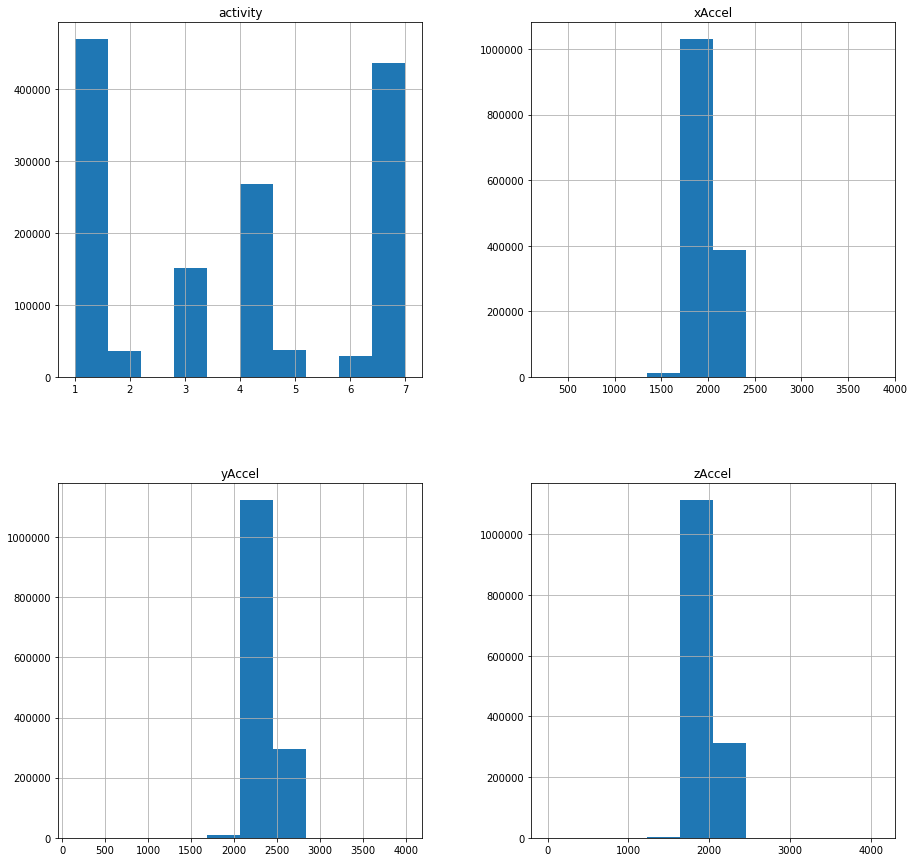

In [59]:
plt.figure()
activityDF.hist(figsize=(15,15))
plt.show()

In [25]:
# frame.plot(kind='box', subplots=True, layout=(4,4),
# sharex=False, sharey=False, figsize=(20,20))
# plt.show()

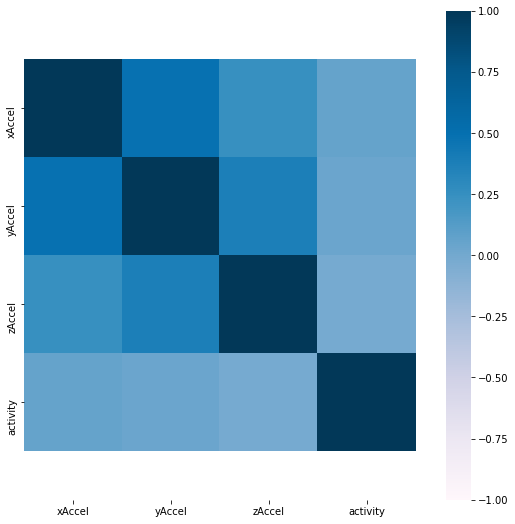

In [69]:
import seaborn as sns
correlations = activityDF.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, cmap="PuBu", center=0, vmin=-1, vmax=1, square=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

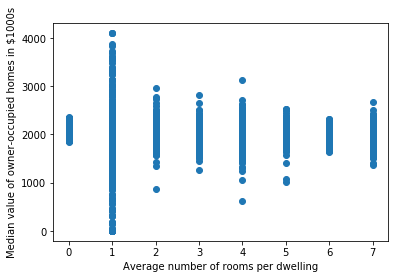

In [24]:
plt.scatter( frame[4], frame[3])
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.show()

In [51]:
activityDF['activity'].value_counts()

1    469437
7    436951
4    268320
3    150927
5     37338
2     35703
6     29320
0      3446
Name: activity, dtype: int64

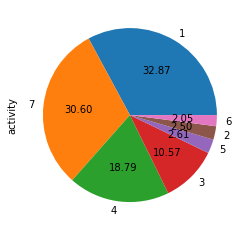

In [62]:
#Gender distribution in the dataset

activityDF['activity'].value_counts().plot(kind='pie',autopct='%.2f')

In [28]:
frame.isnull().any().any()

False

In [29]:
pd.isna(frame).sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [31]:
frame[pd.isna(frame).any(axis=1)]

,0,1,2,3,4


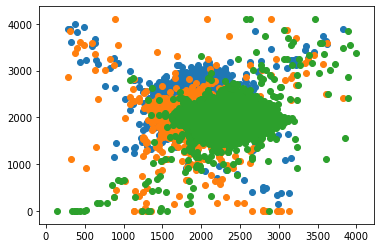

In [72]:
plt.scatter(activityDF['xAccel'],activityDF['yAccel'])
plt.scatter(activityDF['xAccel'],activityDF['zAccel'])
plt.scatter(activityDF['yAccel'],activityDF['zAccel'])
plt.show()

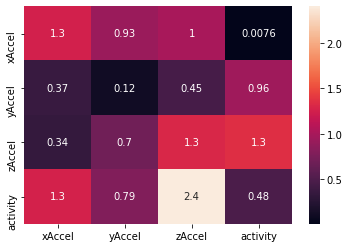

In [68]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

Index= ['xAccel', 'yAccel', 'zAccel', 'activity']
Cols = ['xAccel', 'yAccel', 'zAccel', 'activity']
df = DataFrame(abs(np.random.randn(4, 4)), index=Index, columns=Cols)

sns.heatmap(df, annot=True)

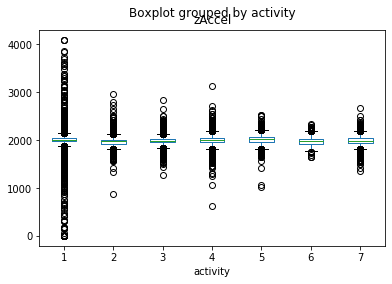

In [75]:
activityDF.boxplot(by ='activity', column =['zAccel'], grid = False) 

/home/harindu/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


AttributeError: 'Annotation' object has no property 'height'

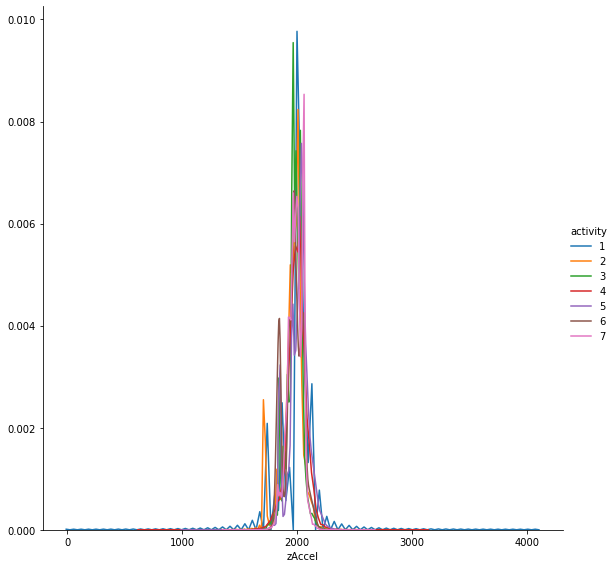

In [78]:
facetgrid = sns.FacetGrid(data = activityDF, hue = "activity", size = 8)
facetgrid.map(sns.distplot, "zAccel", hist = False).add_legend()
plt.annotate('Static Activities(Sitting, Standing, Lying)', xy=(-0.97, 23), xytext=(-0.7, 27),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 15), height = 15, color = "#232b2b")
plt.annotate('Dynamic Activities(Walking, Walking_Upstairs, Walking_Downstairs)', xy=(0.1, 3), xytext=(0.4, 6),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 13), height = 15, color = "#232b2b")
plt.show()


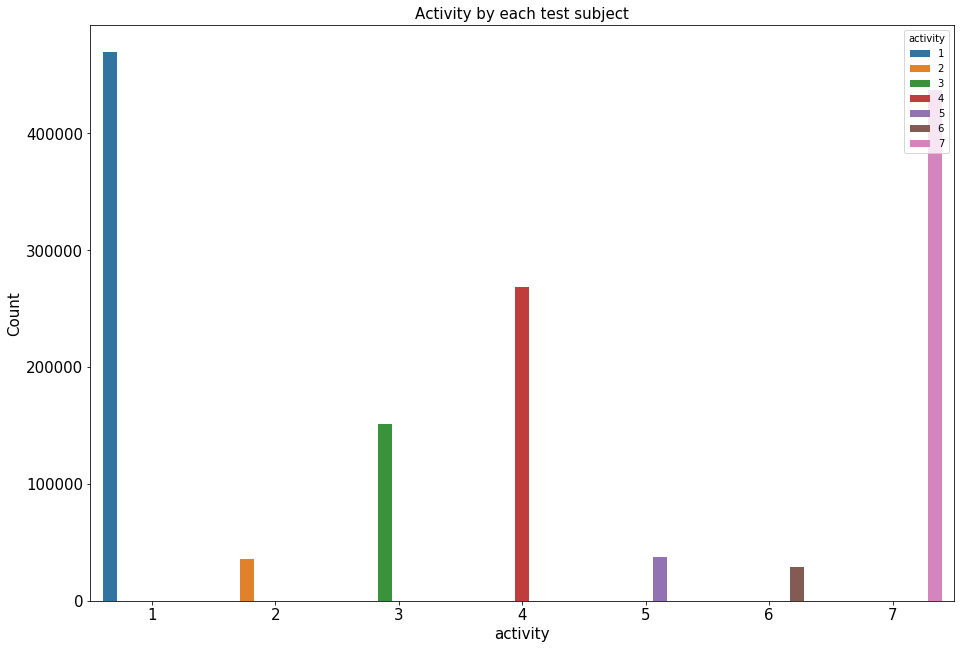

In [79]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Activity by each test subject", fontsize = 15)
plt.tick_params(labelsize = 15)
sns.countplot(x = "activity", hue = "activity", data = activityDF)
plt.xlabel("activity", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()